In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
n_frames_per_seq : int = 8
mode = 'train' # 'train' , 'val' , 'test'
h2o_root = '../data/h2o/'
data_root = h2o_root + f'seq_{n_frames_per_seq}_{mode}/'
img_root = data_root + f'frames_{mode}/'
hand_root = data_root + f'poses_hand_{mode}/'
obj_root = data_root + f'poses_obj_{mode}/'

seq_id = 1
frame_id = 1

In [19]:
def check_img_sample(img):
    print("Img shape:", img.shape)
    print("Img dtype:", img.dtype)

    # display the image using plt
    plt.imshow(img)
    plt.show()
    

Img shape: (360, 640, 3)
Img dtype: uint8


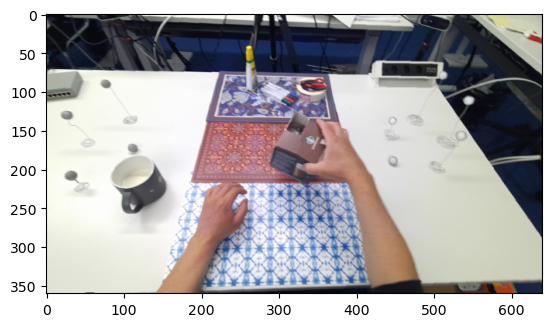

float64


In [29]:
# load img
imgs = np.load(img_root + f'{seq_id:03d}.npy')
check_img_sample(imgs[frame_id])

# load poses
hand_poses = np.load(hand_root + f'{seq_id:03d}.npy')
obj_poses = np.load(obj_root + f'{seq_id:03d}.npy')
print(hand_poses.dtype)
assert hand_poses.shape[0] == n_frames_per_seq
assert hand_poses.shape[1] == 128
assert obj_poses.shape[0] == n_frames_per_seq
assert obj_poses.shape[1] == 64

In [40]:
# function for reprojecting a point onto the image

# uncropped intrinsics
fx = 636.6593017578125 
fy = 636.251953125
u_0 = 635.283881879317
v_0 = 366.8740353496978

# compute new intrinsics of images cropped to [360,640]
fx = 636.6593017578125 * 640 / 1280
fy = 636.251953125 * 360 / 720
u_0 = 635.283881879317 * 640 / 1280
v_0 = 366.8740353496978 * 360 / 720

K = np.array([[fx, 0, u_0], [0, fy, v_0], [0, 0, 1]])

def project_points(points):
    # Points_3D should be a Nx3 numpy array
    projected = np.dot(K, points.T)  # Project points
    # Normalize by the third row
    projected[:2] /= projected[2] 
    return projected[:2].T  # Return only x, y coordinates

In [48]:
def circle_points(img, points, color):
    # points: Nx3 numpy array

    # reproject points
    projected = project_points(points)

    # draw points
    for point in projected:
        cv2.circle(img, (int(point[0]), int(point[1])), 3, color, -1)


Img shape: (360, 640, 3)
Img dtype: uint8


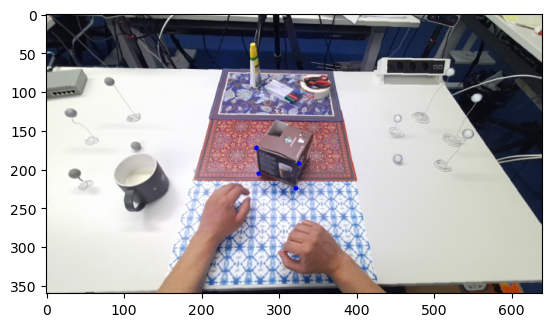

Img shape: (360, 640, 3)
Img dtype: uint8


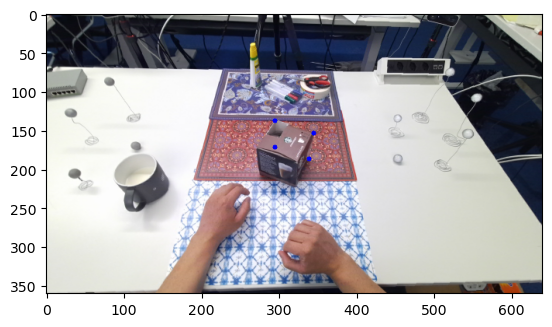

Img shape: (360, 640, 3)
Img dtype: uint8


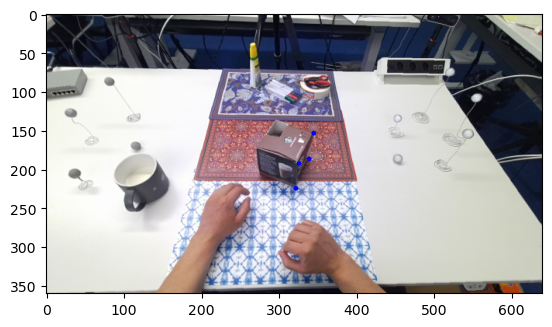

Img shape: (360, 640, 3)
Img dtype: uint8


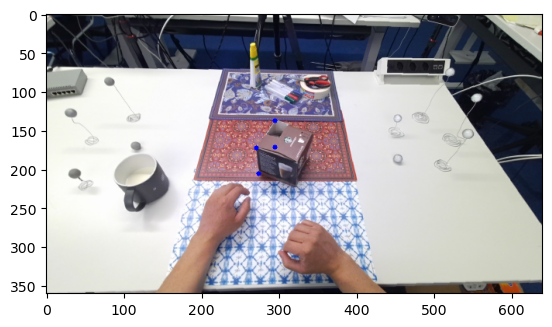

Img shape: (360, 640, 3)
Img dtype: uint8


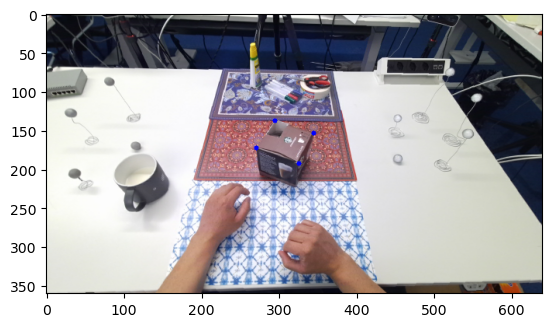

Img shape: (360, 640, 3)
Img dtype: uint8


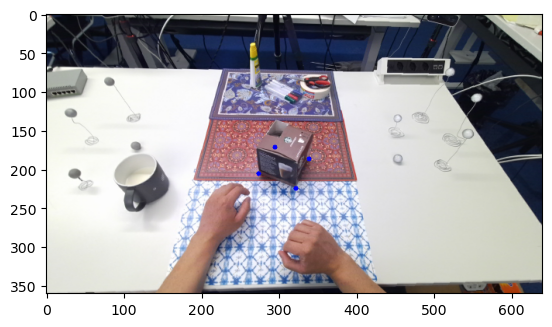

In [58]:
# reproject a sample
frame_id = 6

# get and format hand poses of current frame
hand_poses_left = hand_poses[frame_id, 1:64].reshape((21, 3))
hand_poses_right = hand_poses[frame_id, 65:].reshape((21, 3))

# extract object center point
obj_center = obj_poses[frame_id, 1:4].reshape((1, 3))
# extract object corner vertices
obj_corner_vert = obj_poses[frame_id, 4:]
obj_corner_vert = obj_corner_vert[:24] # 8 3D corner vertices
obj_corner_vert = obj_corner_vert.reshape((8, 3))

faces_indices = [
        [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], 
        [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
    ]
faces = []
for face_indices in faces_indices:
    face = obj_corner_vert[face_indices]
    faces.append(face)

for face in faces:
    img = imgs[frame_id].copy()
    circle_points(img, face, (0, 0, 255))
    check_img_sample(img)

# circle_points(img, obj_corner_vert, (0, 0, 255))
# circle_points(img, hand_poses_left, (255, 0, 0))
# circle_points(img, hand_poses_right, (0, 255, 0))

[[1. 2. 1.]
 [3. 4. 1.]
 [5. 6. 1.]]
